# Set Up

In [22]:
# import the necessary packages
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import pandas as pd 
import seaborn as sns

import torch 
import torch.nn as nn
import albumentations as A
from PIL  import Image 

from models.model import *
from utils import * 
from utils.dataset import * 
from utils.engine import * 

# Load dataset

In [8]:
train = pd.read_csv('dataset/celeb_faces_data/train.csv')

In [9]:
train.head()

,Unnamed: 0,name,unmasked_path,class,path_to_cropped_im,path_to_cropped_image,path_to_masked_image
0,0,mindy_kaling,dataset/celeb_faces_data/train/mindy_kaling/ht...,4,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/ma...
1,1,mindy_kaling,dataset/celeb_faces_data/train/mindy_kaling/ht...,4,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/ma...
2,2,mindy_kaling,dataset/celeb_faces_data/train/mindy_kaling/ht...,4,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/ma...
3,3,mindy_kaling,dataset/celeb_faces_data/train/mindy_kaling/ht...,4,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/ma...
4,4,mindy_kaling,dataset/celeb_faces_data/train/mindy_kaling/ht...,4,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/ma...


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


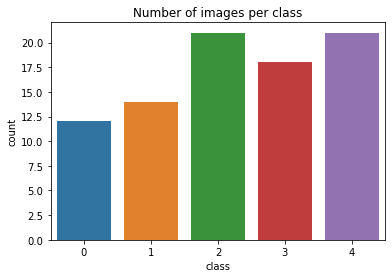

In [12]:
sns.countplot(train['class'])
plt.title('Number of images per class');

In [14]:
valid = pd.read_csv('dataset/celeb_faces_data/valid.csv')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


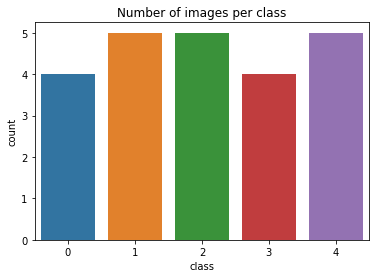

In [15]:
sns.countplot(valid['class'])
plt.title('Number of images per class');

# Training 

In [16]:
# Setting Hyper Parametres 
lr = 0.0001 
epochs = 100
batch_size = 16 
model_path = 'face_recognation.pth' 
device = torch.device('cuda')

model = FaceNet(num_classes = 5 , pretrained = True)
model = model.to(device)

train_dataset = MaskFaceDetectionDataset(train.unmasked_path.values , train['class'].values , is_train = True) 
valid_dataset = MaskFaceDetectionDataset(valid.unmasked_path.values , valid['class'].values  ,  is_train = False) 

def loss_fn(outputs, targets) : 
    targets = targets.to(device , dtype = torch.long)
    return nn.CrossEntropyLoss()(outputs , targets )

val_loss , train_loss = run(
    model,
    train_dataset,
    valid_dataset,
    loss_fn,
    lr,
    epochs,
    batch_size,
    batch_size,
    device,
    model_path,
)

  0%|          | 0.00/107M [00:00<?, ?B/s]

--------- Epoch 0 ---------


100%|██████████| 6/6 [00:01<00:00,  3.11it/s, loss=1.53]

 train_loss  = 1.485555112361908



100%|██████████| 2/2 [00:00<00:00,  9.59it/s, loss=1.22]


 val_loss  = 1.2012854218482971
--------- Epoch 1 ---------


100%|██████████| 6/6 [00:01<00:00,  5.21it/s, loss=0.559]

 train_loss  = 0.5541071246067683



100%|██████████| 2/2 [00:00<00:00,  9.47it/s, loss=0.82] 


 val_loss  = 0.7624370455741882
--------- Epoch 2 ---------


100%|██████████| 6/6 [00:01<00:00,  4.05it/s, loss=0.429]

 train_loss  = 0.4040589705109596



100%|██████████| 2/2 [00:00<00:00,  6.84it/s, loss=0.644]


 val_loss  = 0.5778051912784576
--------- Epoch 3 ---------


100%|██████████| 6/6 [00:01<00:00,  4.97it/s, loss=0.197]

 train_loss  = 0.2357670192917188



100%|██████████| 2/2 [00:00<00:00,  9.54it/s, loss=0.532]


 val_loss  = 0.47357162833213806
--------- Epoch 4 ---------


100%|██████████| 6/6 [00:01<00:00,  5.11it/s, loss=0.102]

 train_loss  = 0.10406382009387016



100%|██████████| 2/2 [00:00<00:00,  9.36it/s, loss=0.354]


 val_loss  = 0.32535673677921295
--------- Epoch 5 ---------


100%|██████████| 6/6 [00:01<00:00,  5.09it/s, loss=0.0748]

 train_loss  = 0.08508242915074031



100%|██████████| 2/2 [00:00<00:00,  8.66it/s, loss=0.219]


 val_loss  = 0.21018584817647934
--------- Epoch 6 ---------


100%|██████████| 6/6 [00:01<00:00,  5.03it/s, loss=0.0883]

 train_loss  = 0.09969191284229358



100%|██████████| 2/2 [00:00<00:00,  9.57it/s, loss=0.181]


 val_loss  = 0.1875709891319275
--------- Epoch 7 ---------


100%|██████████| 6/6 [00:01<00:00,  5.16it/s, loss=0.0515]

 train_loss  = 0.06046051966647307



100%|██████████| 2/2 [00:00<00:00,  9.19it/s, loss=0.191]

 val_loss  = 0.2031581625342369
--------- Epoch 8 ---------



100%|██████████| 6/6 [00:01<00:00,  4.58it/s, loss=0.0441]

 train_loss  = 0.04671833229561647



100%|██████████| 2/2 [00:00<00:00,  8.82it/s, loss=0.117]


 val_loss  = 0.12629106268286705
--------- Epoch 9 ---------


100%|██████████| 6/6 [00:01<00:00,  5.21it/s, loss=0.0372]

 train_loss  = 0.0350369104805092



100%|██████████| 2/2 [00:00<00:00,  9.67it/s, loss=0.096] 


 val_loss  = 0.09842696040868759
--------- Epoch 10 ---------


100%|██████████| 6/6 [00:01<00:00,  5.15it/s, loss=0.0733]

 train_loss  = 0.10580235160887241



100%|██████████| 2/2 [00:00<00:00,  9.21it/s, loss=0.105] 

 val_loss  = 0.11015219241380692
--------- Epoch 11 ---------



100%|██████████| 6/6 [00:01<00:00,  5.02it/s, loss=0.0251]

 train_loss  = 0.02823814555692176



100%|██████████| 2/2 [00:00<00:00,  9.45it/s, loss=0.0902]

 val_loss  = 0.11109751835465431
--------- Epoch 12 ---------



100%|██████████| 6/6 [00:01<00:00,  5.10it/s, loss=0.0626]

 train_loss  = 0.05765242176130414



100%|██████████| 2/2 [00:00<00:00,  9.83it/s, loss=0.101] 

 val_loss  = 0.12235543876886368
--------- Epoch 13 ---------



100%|██████████| 6/6 [00:01<00:00,  5.22it/s, loss=0.0333]

 train_loss  = 0.03678139694966376



100%|██████████| 2/2 [00:00<00:00,  9.00it/s, loss=0.0662]


 val_loss  = 0.08209102414548397
--------- Epoch 14 ---------


100%|██████████| 6/6 [00:01<00:00,  4.65it/s, loss=0.0283] 

 train_loss  = 0.03477848724772533



100%|██████████| 2/2 [00:00<00:00,  8.11it/s, loss=0.127]

 val_loss  = 0.12780380249023438
--------- Epoch 15 ---------



100%|██████████| 6/6 [00:01<00:00,  5.18it/s, loss=0.113] 

 train_loss  = 0.18298332144816717



100%|██████████| 2/2 [00:00<00:00,  9.70it/s, loss=0.274]

 val_loss  = 0.22069763392210007
--------- Epoch 16 ---------



100%|██████████| 6/6 [00:01<00:00,  5.10it/s, loss=0.033] 

 train_loss  = 0.03322739588717619



100%|██████████| 2/2 [00:00<00:00,  9.09it/s, loss=0.56]

 val_loss  = 0.45761220157146454
--------- Epoch 17 ---------



100%|██████████| 6/6 [00:01<00:00,  5.06it/s, loss=0.0559]

 train_loss  = 0.05521114698300759



100%|██████████| 2/2 [00:00<00:00,  9.34it/s, loss=0.406]

Epoch    18: reducing learning rate of group 0 to 2.0000e-05.
 val_loss  = 0.3190164677798748
--------- Epoch 18 ---------



100%|██████████| 6/6 [00:01<00:00,  5.03it/s, loss=0.0244]

 train_loss  = 0.022816738734642666



100%|██████████| 2/2 [00:00<00:00,  9.02it/s, loss=0.296]

 val_loss  = 0.2523243948817253
--------- Epoch 19 ---------



100%|██████████| 6/6 [00:01<00:00,  5.28it/s, loss=0.0616]

 train_loss  = 0.10105496505275369



100%|██████████| 2/2 [00:00<00:00,  6.01it/s, loss=0.353]


 val_loss  = 0.32197142392396927
Eraly Stopping on Epoch 19
Best Loss =  0.08209102414548397


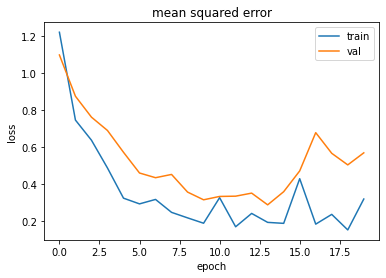

In [17]:
# summarize history for accuracy
plt.plot(np.sqrt(train_loss)) 
plt.plot(np.sqrt(val_loss))
plt.title('mean squared error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Model Evaluation 

In [18]:
def softmax(z):
    assert len(z.shape) == 2
    s = np.max(z, axis=1)
    s = s[:, np.newaxis] # necessary step to do broadcasting
    e_x = np.exp(z - s)
    div = np.sum(e_x, axis=1)
    div = div[:, np.newaxis] # dito
    return e_x / div

In [19]:
pred  = predict(model , valid_dataset)
pred = sigmod(pred)
valid['predictions'] = softmax(pred).argmax(axis=1)

100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


In [20]:
accuracy_score(valid['class'].values, valid.predictions.values)

1.0

<AxesSubplot:>

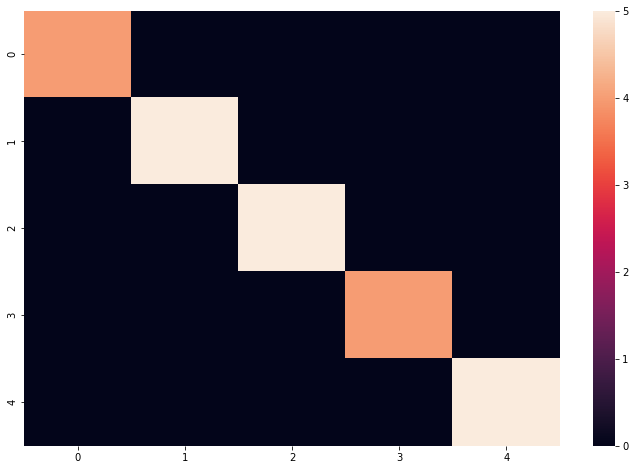

In [23]:
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(valid['class'].values, valid.predictions.values))

In [24]:
print(metrics.classification_report(valid['class'].values, valid.predictions.values))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



# Export model with ONNX

In [30]:
# Export the model
x = valid_dataset[1]['image'].unsqueeze(0).to(device , dtype = torch.float)
torch.onnx.export(model,               # model being run
                  x,                         # model input (or a tuple for multiple inputs)
                  "unmasked_face_recognizer.onnx",   # where to save the model (can be a file or file-like object)
                  export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=10,          # the ONNX version to export the model to
                  do_constant_folding=True,  # whether to execute constant folding for optimization
                  input_names = ['input'],   # the model's input names
                  output_names = ['output'], # the model's output names
                  dynamic_axes={'input' : {0 : 'batch_size'},    # variable lenght axes
                                'output' : {0 : 'batch_size'}}
                 )